<h1>Pengaplikasian Model Linear Regression 1</h1>

Aplikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [ ]:
import numpy as np

rng = np.random.RandomState(1)

x = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [ ]:
# your code here
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)


coefficient of determination: 1.0
intercept: 0.5000000016247981
slope: [ 1.5 -5.   9.  10. ]


<h1>Pengaplikasian Model Linear Regression 2</h1>

Download [`taiwan_real_estate2.csv](https://drive.google.com/file/d/1CgU-QIxvK_r-My8I0RSYR647JQMFlCJn/view?usp=sharing)


1. Buat model regresi linear dengan response variable price (kolom `price_twd_msq`) dan explanatory variable jumlah store yang beredar di sekitar (kolom `n_convenience`). Bagaimana cara kita mengukur performa model tersebut? Apa kesimpulan yang bisa ditarik? 
2. Buat qq-plot dari hasil model tersebut. Apa insight yang bisa kita dapatkan? 
Pengumpulan dapat melalui google colab/notebook. Kata-kata penjelasan tambahan dapat ditaro di cell dalam notebook tersebut. Good luck! 
*untuk package teman-teman bebas memilih. Opsi salah satunya adalah dengan mengimport `ols` dan `qqplot` dari package `statsmodel` 
from statsmodels.formula.api import ols 
from statsmodels.api import qqplot


In [ ]:
# your code here
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pylab as py
from scipy import stats
from statsmodels.api import qqplot

In [ ]:
path = '/content/gdrive/MyDrive/Machine Learning/Notebook Regression/taiwan_real_estate2.csv'
df = pd.read_csv(path, delimiter=',')
df

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607
410,90.45606,9,0 to 15,15.128593
411,390.96960,7,15 to 30,12.284418
412,104.81010,5,0 to 15,15.885023


Text(0, 0.5, 'price_twd_msq')

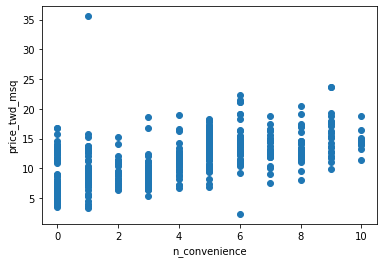

In [ ]:
X = df['n_convenience']
Y = df['price_twd_msq']
plt.scatter(X, Y)
plt.xlabel('n_convenience')
plt.ylabel('price_twd_msq')

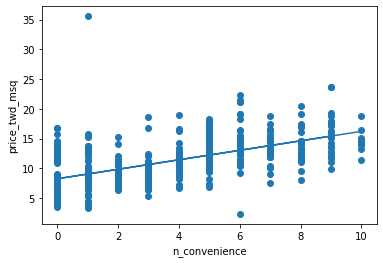

In [ ]:
from sklearn.linear_model import LinearRegression
X = df['n_convenience'].values.reshape(-1,1)
Y = df['price_twd_msq']
lr_model = LinearRegression()
lr_model.fit(X, Y)
y_pred = lr_model.predict(X)
plt.scatter(X, Y)
plt.xlabel('n_convenience')
plt.ylabel('price_twd_msq')
# Here we are plotting our regression line ŷ = θ₀ + θ₁𝑥
plt.plot(X, y_pred)

In [ ]:
theta_0 = lr_model.intercept_
theta_1 = lr_model.coef_
theta_0, theta_1

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
# Create the model, fit it
price_twd_msq_n_convenience = ols("price_twd_msq ~ n_convenience", data=df).fit()

#Print the parameters of the fitted model
print(price_twd_msq_n_convenience.params) 

Intercept        8.224237
n_convenience    0.798080
dtype: float64


Hubungan Antara n-convenience dengan price_twd_msq tidak stabil, namun yang pasti semakin tinggi price maka akan semakin kecil jumlah conveniece.

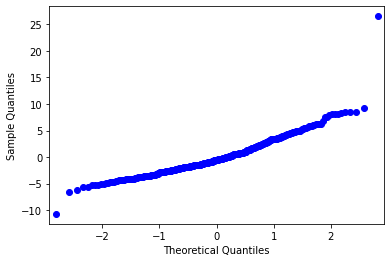

In [ ]:
data = sm.datasets.longley.load(as_pandas=False)
exog = sm.add_constant(data.exog)
mod_fit = ols("price_twd_msq ~ n_convenience", data=df).fit()
res = mod_fit.resid 
fig = sm.qqplot(res)
plt.show()